<a href="https://colab.research.google.com/github/ashwatisajit/EDA/blob/main/EDA_Digital_Assignment_1_Supermarket_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME: ASHWATI N ALAKKAL SAJIT | REG NO: 21BDS0140**

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/supermarket_sales.csv'
data = pd.read_csv(url)

In [2]:
# Display the first few rows of the dataset
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
# Display the last few rows of the dataset
data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03/02/19,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02/09/19,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [4]:
# Display the data types of each column in the DataFrame
data_types = data.dtypes
data_types

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Total,float64


In [5]:
# Display the shape of the DataFrame
data_shape = data.shape
print(data_shape)

(1000, 17)


In [6]:
# Calculate the mean of the "Rating" column using numpy's mean function
data_mean = np.mean(data["Rating"])
# Another method to calculate the mean is by using pandas' built-in mean function for a column
# data_mean = data["Rating"].mean()
print(f"Mean of the Ratings from the dataset: {data_mean:.2f}")

Mean of the Ratings from the dataset: 6.97


In [7]:
data_1 = data.copy()

# Calculate the total price without tax by multiplying the unit price by the quantity
data_1['TotalPriceWithoutTax'] = data_1['Unit price'] * data_1['Quantity']

# Calculate the tax amount, which is 5% of the total price without tax
data_1['TaxAmount'] = data_1['TotalPriceWithoutTax'] * 0.05  # Assuming a 5% tax rate

# Calculate the net total by adding the tax amount to the total price without tax
data_1['NetTotal'] = data_1['TotalPriceWithoutTax'] + data_1['TaxAmount']

# Convert the 'Customer type' column to numeric values: 1 for 'Member' and 0 for 'Normal'
data_1['CustomerTypeNumeric'] = data_1['Customer type'].map({'Member': 1, 'Normal': 0})

# Extract the hour from the 'Time' column to analyze purchase patterns by the time of day
data_1['PurchaseHour'] = pd.to_datetime(data_1['Time']).dt.hour

# Calculate the gross income percentage relative to the total price (for profitability analysis)
data_1['GrossIncomePercentage'] = (data_1['gross income'] / data_1['Total']) * 100

# Categorize customer ratings into three categories: 'Poor', 'Average', and 'Good' based on the rating scale
bins = [0, 4, 7, 10]  # Define the bins for rating intervals (1-3: Poor, 4-6: Average, 7-10: Good)
labels = ['Poor', 'Average', 'Good']  # Labels corresponding to the bins
data_1['RatingCategory'] = pd.cut(data_1['Rating'], bins=bins, labels=labels)  # Categorize ratings using the defined bins

data_1.head()

<ipython-input-7-06bb1acfcd7e>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_1['PurchaseHour'] = pd.to_datetime(data_1['Time']).dt.hour


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,gross margin percentage,gross income,Rating,TotalPriceWithoutTax,TaxAmount,NetTotal,CustomerTypeNumeric,PurchaseHour,GrossIncomePercentage,RatingCategory
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,4.761905,26.1415,9.1,522.83,26.1415,548.9715,1.0,13,4.761905,Good
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,4.761905,3.8200,9.6,76.40,3.8200,80.2200,0.0,10,4.761905,Good
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,4.761905,16.2155,7.4,324.31,16.2155,340.5255,0.0,13,4.761905,Good
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,4.761905,23.2880,8.4,465.76,23.2880,489.0480,1.0,20,4.761905,Good
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,4.761905,30.2085,5.3,604.17,30.2085,634.3785,0.0,10,4.761905,Average


In [8]:
# Count the occurrences of each payment method in the 'Payment' column
data['Payment'].value_counts()

,count
Payment,
Ewallet,345
Cash,344
Credit card,310


In [9]:
# Generate descriptive statistics for numerical columns in the dataset
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,9.990000e+02,1000.000000,999.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.973373
std,26.494628,2.923431,11.708825,245.885335,234.17651,8.886233e-16,11.708825,1.719309
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.500000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.000000


Data Deduplication

In [10]:
# Count the number of duplicated rows
num_duplicates = data.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

Number of duplicated rows: 0


Handling missing data

In [11]:
# Count the number of missing values (NaN) in each column
data.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,2
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [12]:
# Count the total number of missing values (NaN) in the dataset
data.isnull().sum().sum()

5

In [13]:
# Count the number of non-missing values in each column
data.count()

,0
Invoice ID,1000
Branch,1000
City,1000
Customer type,1000
Gender,998
Product line,1000
Unit price,1000
Quantity,1000
Tax 5%,1000
Total,1000


Filling missing values

In [14]:
# Fill missing values for categorical data

# Fill missing values in 'Gender' with the mode
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

# Fill missing values in 'Payment' with the mode
data['Payment'].fillna(data['Payment'].mode()[0], inplace=True)


In [15]:
# Fill missing values for numerical data

# Fill missing values in 'gross margin percentage' with the mean
data['gross margin percentage'].fillna(data['gross margin percentage'].mean(), inplace=True)

# Fill missing values in 'Rating' with the median (more robust against outliers)
data['Rating'].fillna(data['Rating'].median(), inplace=True)


In [16]:
# Count the total number of missing values (NaN) in the dataset
data.isnull().sum().sum()

0

Outlier detection and filtering

In [17]:
from scipy import stats

# Select only numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Create a dictionary to hold outliers for each column
outlier_dict = {}

# Iterate over each numerical column
for column in numerical_columns:
    # Calculate Z-scores
    z_scores = np.abs(stats.zscore(data[column]))

    # Identify outliers
    outliers = np.where(z_scores > 3)[0]  # Z-score threshold is set at 3

    # Store the outliers in the dictionary
    outlier_dict[column] = data.iloc[outliers]

for col, outlier_data in outlier_dict.items():
    print(f"Outliers in '{col}' column:")
    if not outlier_data.empty:
        print(outlier_data)
    else:
        print("No outliers detected.")
    print("\n")


Outliers in 'Unit price' column:
No outliers detected.


Outliers in 'Quantity' column:
No outliers detected.


Outliers in 'Tax 5%' column:
No outliers detected.


Outliers in 'Total' column:
No outliers detected.


Outliers in 'cogs' column:
No outliers detected.


Outliers in 'gross margin percentage' column:
      Invoice ID Branch       City Customer type Gender       Product line  \
236  211-30-9270      C  Naypyitaw        Normal   Male  Health and beauty   

     Unit price  Quantity  Tax 5%    Total       Date   Time      Payment  \
236       17.41         5  4.3525  91.4025  1/28/2019  15:16  Credit card   

      cogs  gross margin percentage  gross income  Rating  
236  87.05                 4.761905        4.3525     4.9  


Outliers in 'gross income' column:
No outliers detected.


Outliers in 'Rating' column:
No outliers detected.




Univariate Analysis

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

Data Cleaning

In [19]:
# Create a boolean DataFrame where True indicates a '?' value
question_mark_mask = (data == '?')

# Get the columns that contain '?' values
columns_with_question_marks = question_mark_mask.any()

# Extract the names of the columns that have '?' values
columns_with_question_marks_list = columns_with_question_marks[columns_with_question_marks].index.tolist()

# Print the result
if columns_with_question_marks_list:
    print("The following columns contain '?' values:")
    print(columns_with_question_marks_list)
else:
    print("No columns contain '?' values.")


The following columns contain '?' values:
['Customer type', 'Gender']


In [20]:
# Replace '?' with NaN for easier handling of missing values
data.replace('?', np.nan, inplace=True)

# Calculate the mode for 'Customer type' and 'Gender'
customer_type_mode = data['Customer type'].mode()[0]
gender_mode = data['Gender'].mode()[0]

# Replace NaN values with the calculated mode
data['Customer type'].fillna(customer_type_mode, inplace=True)
data['Gender'].fillna(gender_mode, inplace=True)

In [21]:
# Create a boolean DataFrame where True indicates a '?' value
question_mark_mask = (data == '?')

# Get the columns that contain '?' values
columns_with_question_marks = question_mark_mask.any()

# Extract the names of the columns that have '?' values
columns_with_question_marks_list = columns_with_question_marks[columns_with_question_marks].index.tolist()

# Print the result
if columns_with_question_marks_list:
    print("The following columns contain '?' values:")
    print(columns_with_question_marks_list)
else:
    print("No columns contain '?' values.")

No columns contain '?' values.


In [22]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.973400
std,26.494628,2.923431,11.708825,245.885335,234.17651,2.810072e-17,11.708825,1.718449
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.500000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.000000


In [23]:
# List of important numerical variables
vars = ['Unit price', 'Quantity', 'Total', 'Tax 5%', 'gross income', 'Rating']

# Create a dictionary to store the results
statistics = {}

# Calculate mean, median, and mode for each important variable
for var in vars:
    mean_val = data[var].mean()
    median_val = data[var].median()
    mode_val = data[var].mode()[0]  # Get the first mode

    statistics[var] = {
        'Mean': mean_val,
        'Median': median_val,
        'Mode': mode_val
    }

# Convert the statistics dictionary to a DataFrame for better visualization
stats_df = pd.DataFrame(statistics).T
print(stats_df)


                    Mean   Median    Mode
Unit price     55.672130   55.230  83.770
Quantity        5.510000    5.000  10.000
Total         322.966749  253.848  87.234
Tax 5%         15.379369   12.088   4.154
gross income   15.379369   12.088   4.154
Rating          6.973400    7.000   6.000


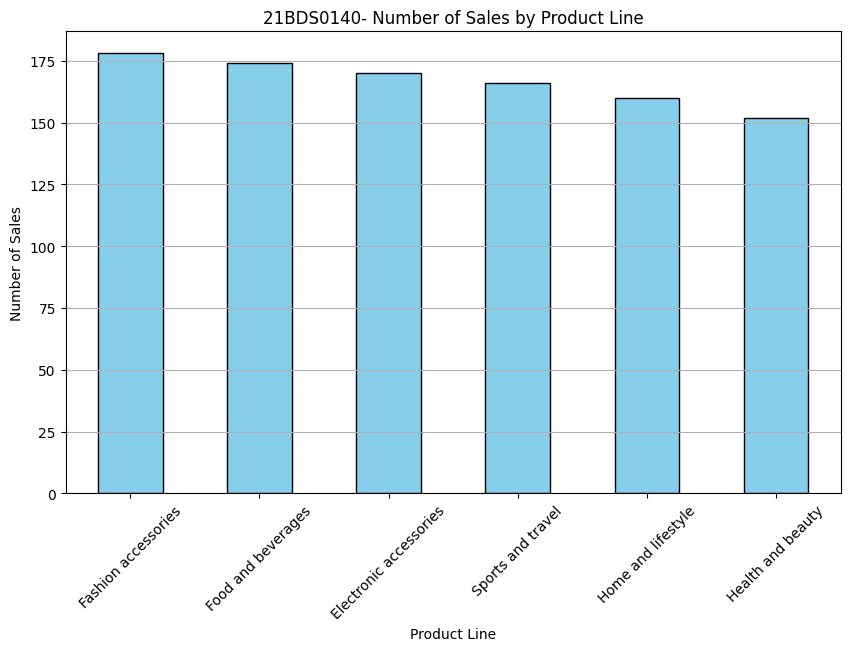

In [24]:
import matplotlib.pyplot as plt

# Count the occurrences of each product line
product_counts = data['Product line'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title("21BDS0140- Number of Sales by Product Line")
plt.ylabel('Number of Sales')
plt.xlabel('Product Line')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines for better visibility
plt.show()


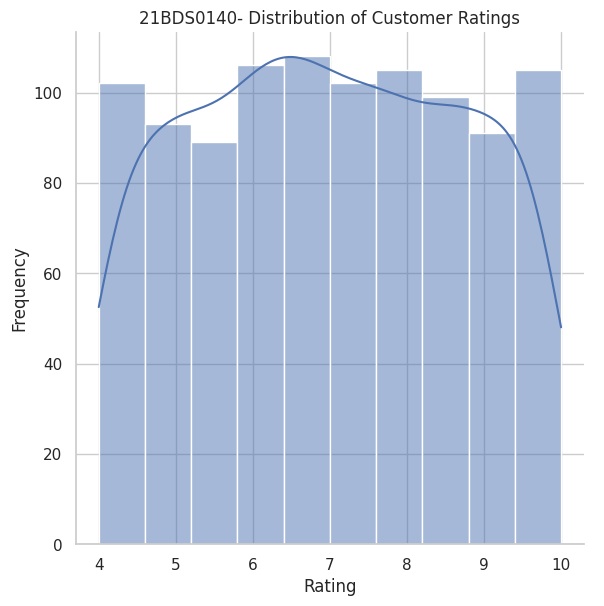

In [25]:
# Create a FacetGrid for the 'Rating' column
sns.set(style="whitegrid")  # Set the style for the plot
g = sns.FacetGrid(data, height=6)  # Create a grid for the distribution plot
g.map(sns.histplot, "Rating", bins=10, kde=True)  # Use histplot with KDE
g.add_legend()

# Add title and labels
plt.title("21BDS0140- Distribution of Customer Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")

# Show the plot
plt.show()


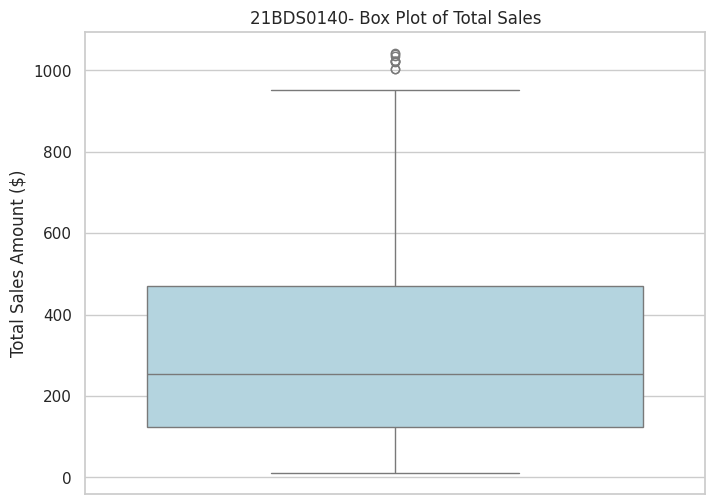

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for the 'Total' column
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Total'], color='lightblue')

# Add title and labels
plt.title("21BDS0140- Box Plot of Total Sales")
plt.ylabel("Total Sales Amount ($)")

# Show the plot
plt.show()


Bivariate Analysis

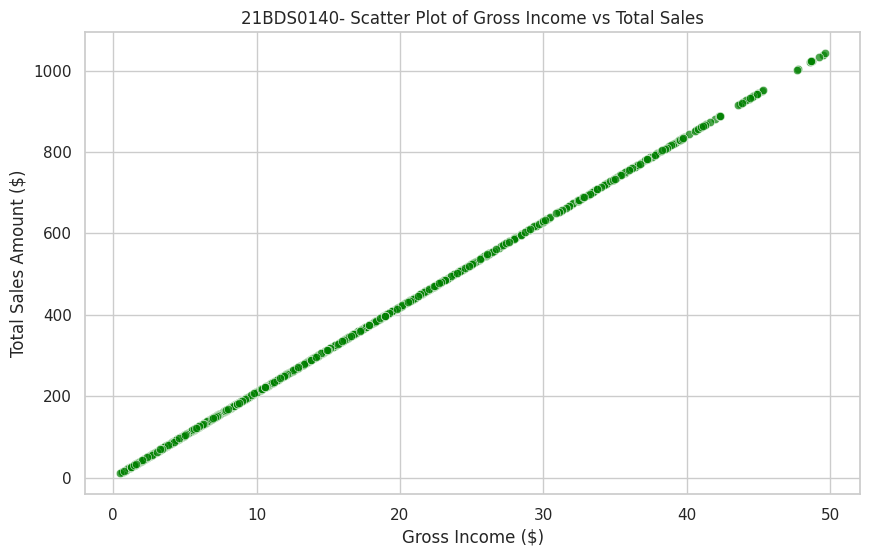

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot for 'Gross income' vs 'Total'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='gross income', y='Total', alpha=0.7, color='green')

# Add title and labels
plt.title("21BDS0140- Scatter Plot of Gross Income vs Total Sales")
plt.xlabel("Gross Income ($)")
plt.ylabel("Total Sales Amount ($)")

# Show the plot
plt.show()



<ipython-input-28-e836177d2e9c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Customer type', y='Total', palette='Set2')


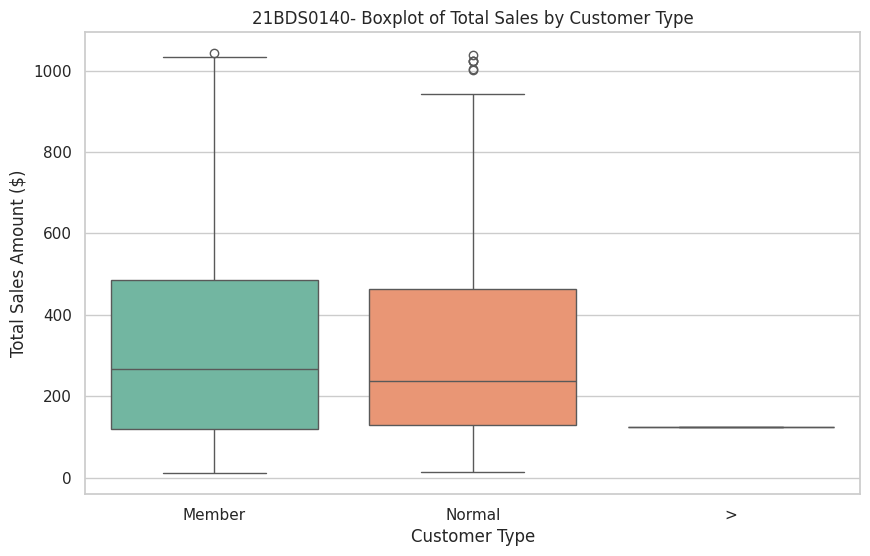

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for 'Total' across different 'Customer type'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Customer type', y='Total', palette='Set2')

# Add title and labels
plt.title("21BDS0140- Boxplot of Total Sales by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Total Sales Amount ($)")

# Show the plot
plt.show()


<ipython-input-29-3da07e6a412c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Gender', y='Total', palette='Set2')


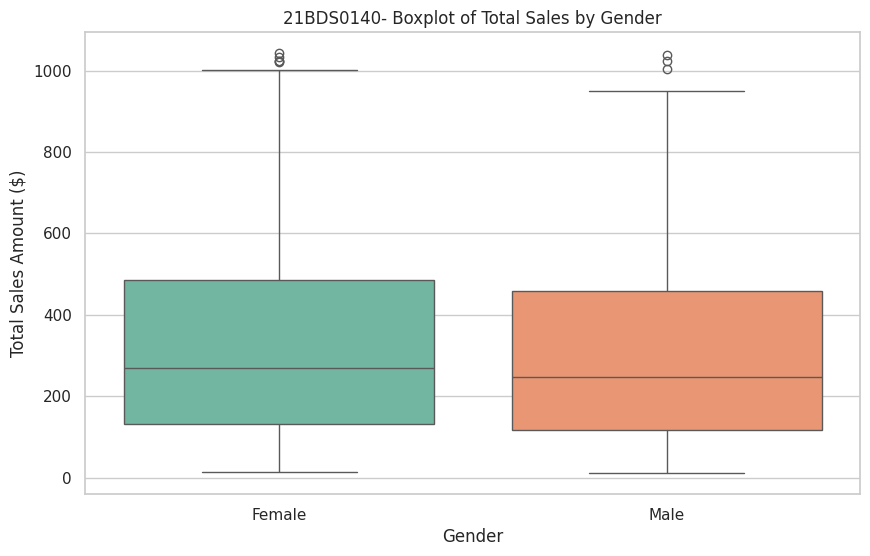

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for 'Total' across different 'Gender'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Gender', y='Total', palette='Set2')

# Add title and labels
plt.title("21BDS0140- Boxplot of Total Sales by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Sales Amount ($)")

# Show the plot
plt.show()



Multivariate Analysis

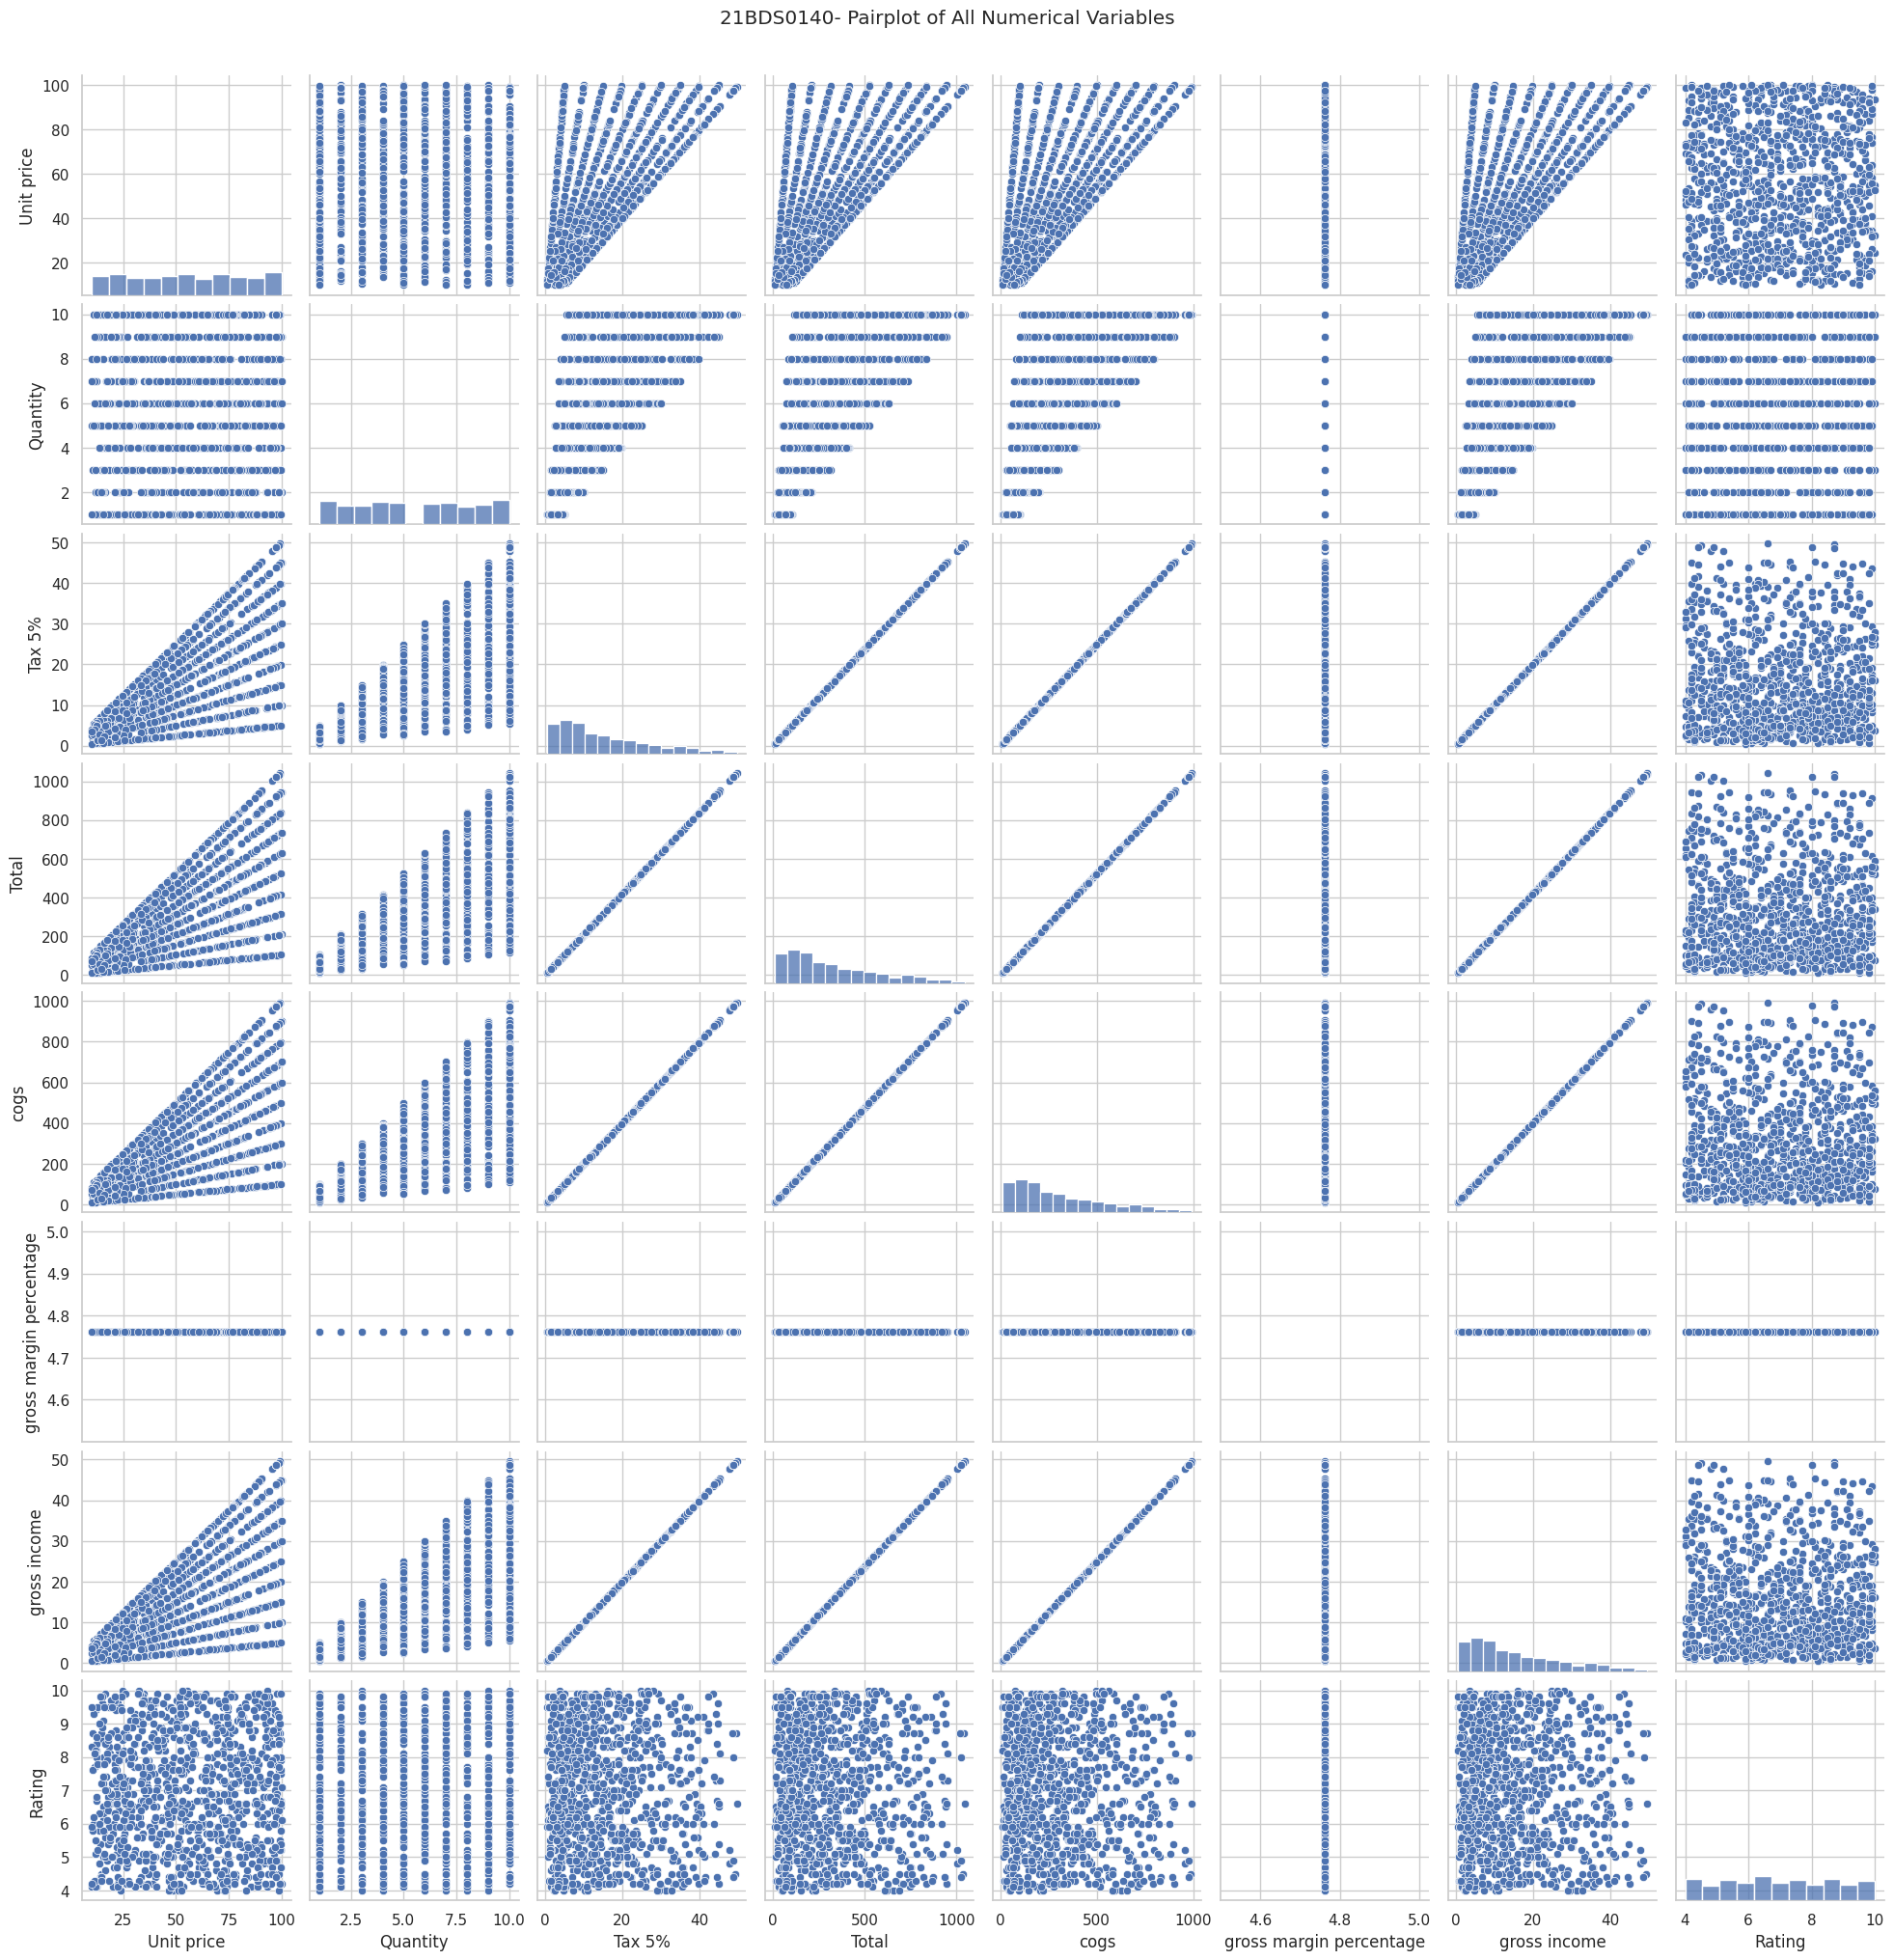

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns from the dataset
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Create a pairplot for all numerical variables
sns.pairplot(data[numerical_columns])

# Show the plot with a title
plt.suptitle("21BDS0140- Pairplot of All Numerical Variables", y=1.02)  # Adjust title position
plt.show()


In [31]:
from scipy import stats

# Replace 'Variable1' and 'Variable2' with the actual column names from your dataset
corr = stats.pearsonr(data['Total'], data['gross income'])  # Example using 'Total' and 'gross income'

print("p-value:\t", corr[1])
print("correlation coefficient:\t", corr[0])


p-value:	 0.0
correlation coefficient:	 0.9999999999999998


In [32]:
correlation = data.corr(method='pearson', numeric_only=True)
correlation

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,-0.047974,0.633962,-0.008632
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,-0.010685,0.705510,-0.016166
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,-0.035658,1.000000,-0.036640
Total,0.633962,0.705510,1.000000,1.000000,1.000000,-0.035658,1.000000,-0.036640
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,-0.035658,1.000000,-0.036640
gross margin percentage,-0.047974,-0.010685,-0.035658,-0.035658,-0.035658,1.000000,-0.035507,-0.038889
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,-0.035507,1.000000,-0.036640
Rating,-0.008632,-0.016166,-0.036640,-0.036640,-0.036640,-0.038889,-0.036640,1.000000


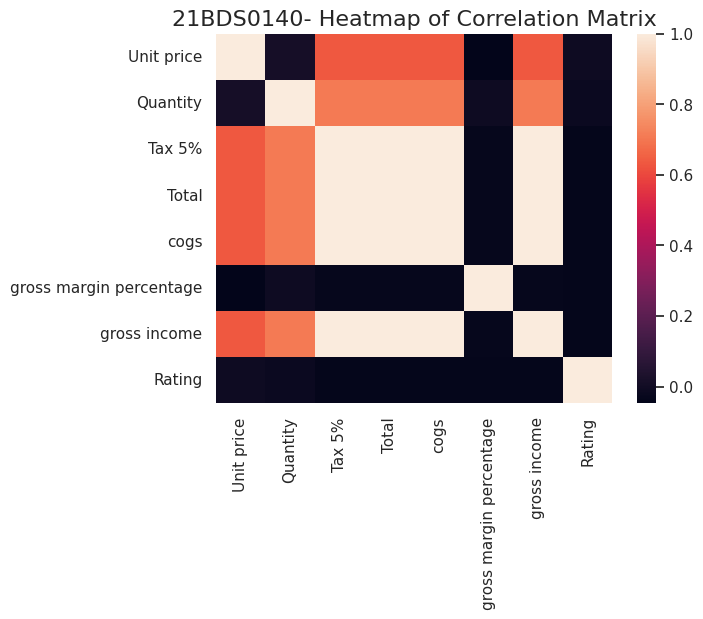

In [33]:
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns)
plt.title("21BDS0140- Heatmap of Correlation Matrix", fontsize=16)
plt.show()